   Schizophrenia disorders  Depressive disorders  Anxiety disorders  \
0                 0.223206              4.996118           4.713314   
1                 0.222454              3.767303           4.100860   
2                 0.221751              4.981346           4.683743   
3                 0.220987              3.767303           4.673549   
4                 0.220183              4.977782           4.670810   

   Bipolar disorder  Eating disorders  
0          0.703023          0.127700  
1          0.702069          0.123256  
2          0.700792          0.195365  
3          0.700087          0.115089  
4          0.699898          0.195365  


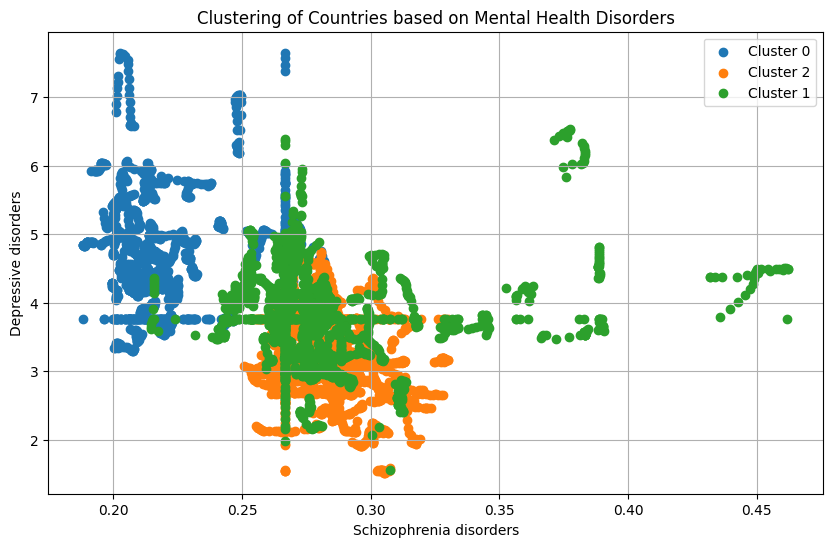

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('mental_cleaned.csv')
cols = ['Country', 'Code', 'Year', 'Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders','Bipolar disorder', 'Eating disorders']
data.columns = cols
# Drop unnecessary columns
data_numeric = data.drop(['Country', 'Code', 'Year'], axis=1)
print(data_numeric.head())
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters as needed
clusters = kmeans.fit_predict(data_normalized)

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Schizophrenia disorders'], cluster_data['Depressive disorders'], label=f'Cluster {cluster}')

plt.xlabel('Schizophrenia disorders')
plt.ylabel('Depressive disorders')
plt.title('Clustering of Countries based on Mental Health Disorders')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
data.Country.nunique()

214

       Country Code    Year  Schizophrenia disorders  Depressive disorders  \
0  Afghanistan  AFG  1990.0                 0.223206              4.996118   
1  Afghanistan  AFG  1991.0                 0.222454              3.767303   
2  Afghanistan  AFG  1992.0                 0.221751              4.981346   
3  Afghanistan  AFG  1993.0                 0.220987              3.767303   
4  Afghanistan  AFG  1994.0                 0.220183              4.977782   

   Anxiety disorders  Bipolar disorder  Eating disorders  Cluster  
0           4.713314          0.703023          0.127700        0  
1           4.100860          0.702069          0.123256        0  
2           4.683743          0.700792          0.195365        0  
3           4.673549          0.700087          0.115089        0  
4           4.670810          0.699898          0.195365        0  


C:\Users\Public\Temp\ipykernel_27584\3027169754.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


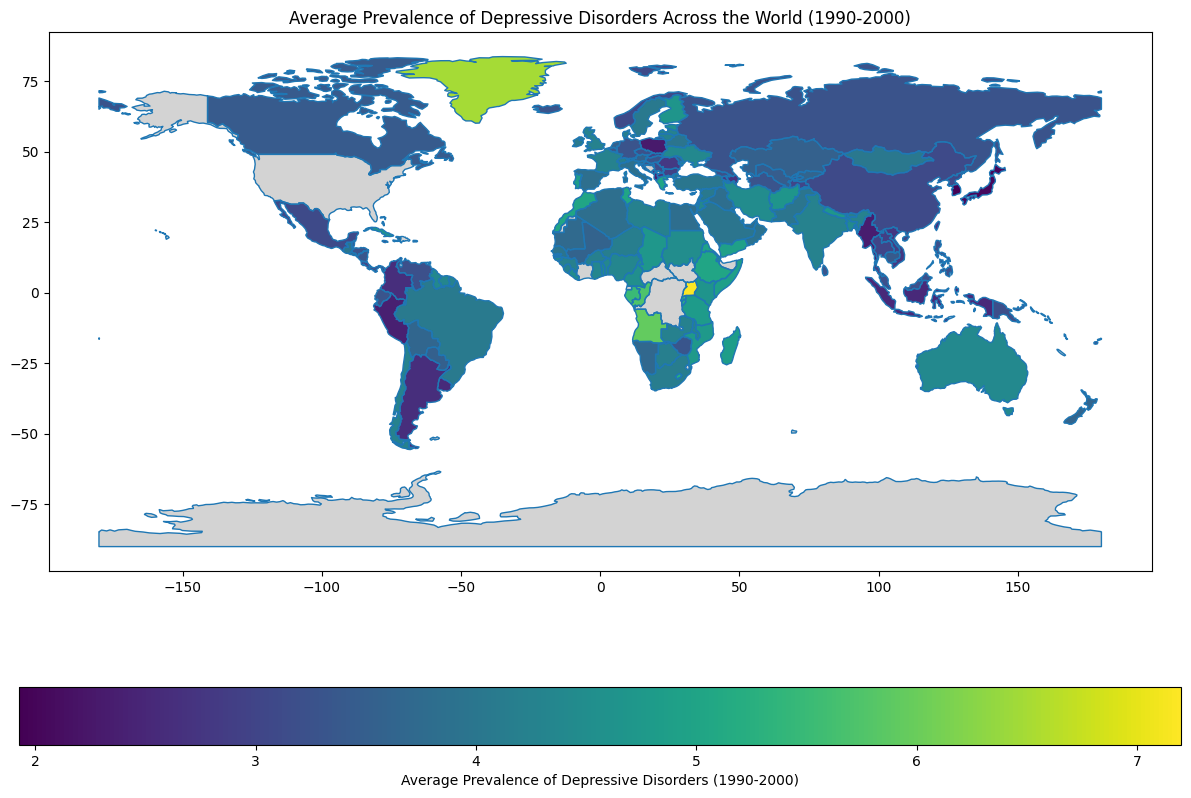

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

filtered_data = data[(data['Year'] >= 1990) & (data['Year'] <= 2000)]
print(filtered_data.head())
grouped_data = data.groupby('Country')[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder', 'Eating disorders']].mean().reset_index()

# Group the data by country and calculate the average prevalence of each disorder
numeric_cols = filtered_data.select_dtypes(include=[np.number]).columns.tolist()

# Now, group by 'Entity' and calculate the mean only for numeric columns
grouped_data = filtered_data.groupby('Country')[numeric_cols].mean().reset_index()

# Drop the 'Year' column since it's no longer needed after averaging
grouped_data = grouped_data.drop(columns=['Year'])

grouped_data.head()

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the mental health data on the country name
world = world.merge(grouped_data, left_on='name', right_on='Country', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Depressive disorders', ax=ax, legend=True,
           legend_kwds={'label': "Average Prevalence of Depressive Disorders (1990-2000)", 'orientation': "horizontal"},
           missing_kwds={'color': 'lightgrey'})

plt.title('Average Prevalence of Depressive Disorders Across the World (1990-2000)')
plt.show()

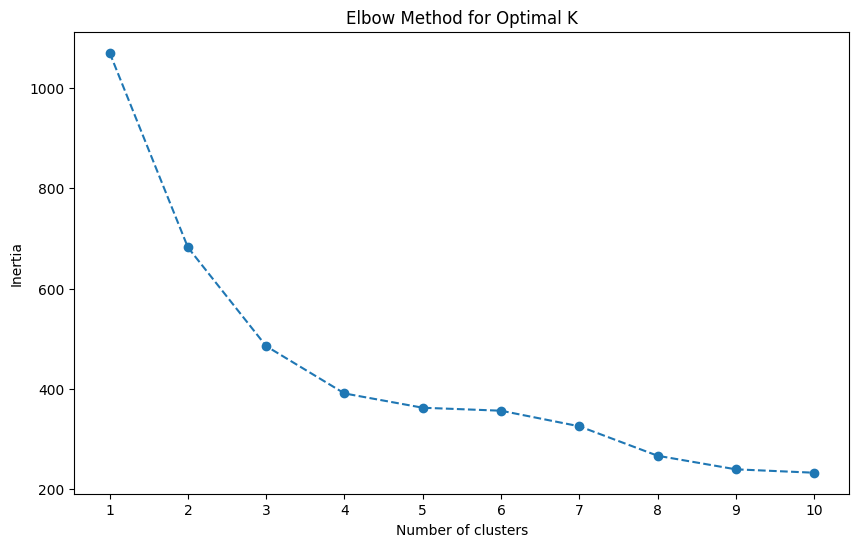

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Selecting the relevant columns for clustering
clustering_data = grouped_data[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder', 'Eating disorders']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, 11, 1))
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'data' is your DataFrame and it's correctly loaded

# Step 1: Select only numeric columns for clustering (exclude country names or codes)
clustering_data = data[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder', 'Eating disorders']]

# Step 2: Standardize the numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data)

# Step 3: Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Step 4: Attach the cluster labels back to the original dataset
data['Cluster'] = clusters

# Now data includes a 'Cluster' column with the assigned cluster label for each entry
print(data[['Country', 'Cluster']].head())  # Replace 'Country' with the correct column name for country names in your dataset

# Proceed with analysis of clusters



       Country  Cluster
0  Afghanistan        0
1  Afghanistan        0
2  Afghanistan        0
3  Afghanistan        0
4  Afghanistan        0


In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'data' is your original DataFrame with 'Cluster' labels

# Define the features you want to plot pairwise
features = ['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder', 'Eating disorders']

# Create subplots: Since there are 5 features, we'll have (5 choose 2) = 10 pairs to plot
num_features = len(features)
total_pairs = num_features * (num_features - 1) // 2
rows = cols = int(total_pairs ** 0.5) + (total_pairs % int(total_pairs ** 0.5) > 0)

fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f'{x} vs {y}' for x in features for y in features if x != y])

pair_idx = 1
for i, feature_x in enumerate(features):
    for feature_y in features[i+1:]:
        row = (pair_idx - 1) // cols + 1
        col = (pair_idx - 1) % cols + 1

        for cluster in data['Cluster'].unique():
            cluster_data = data[data['Cluster'] == cluster]
            fig.add_trace(go.Scatter(x=cluster_data[feature_x], y=cluster_data[feature_y], mode='markers', name=f'Cluster {cluster}'),
                          row=row, col=col)
        pair_idx += 1

fig.update_layout(height=1200, width=1200, title_text="Pairwise Plotting of Clusters")
fig.show()


In [13]:
data = pd.read_csv('mental_cleaned.csv')
data.columns = ['Country', 'Code', 'Year', 'Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorder', 'Eating disorders']
# Perform K-Means clustering with 3 clusters
data.drop('Code', axis=1, inplace=True)
data_aggregated = data.groupby('Country').mean()

# Drop the 'Year' column since it's not needed for clustering
data_aggregated.drop('Year', axis=1, inplace=True)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(data_aggregated)

# Add the cluster labels to the aggregated data
data_aggregated['Cluster'] = kmeans.labels_

# Compute the mean values of the disorder prevalence rates within each cluster
cluster_means = data_aggregated.groupby('Cluster').mean()

# Display the cluster means
cluster_means



,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorder,Eating disorders
Cluster,,,,,
0,0.277944,3.122979,3.697222,0.548584,0.160087
1,0.239912,4.598382,3.791498,0.620293,0.146608
2,0.288707,3.765467,5.580385,0.865200,0.363274


In [14]:
data

,Country,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorder,Eating disorders
0,Afghanistan,1990.000000,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,1991.000000,0.222454,3.767303,4.100860,0.702069,0.123256
2,Afghanistan,1992.000000,0.221751,4.981346,4.683743,0.700792,0.195365
3,Afghanistan,1993.000000,0.220987,3.767303,4.673549,0.700087,0.115089
4,Afghanistan,1994.000000,0.220183,4.977782,4.670810,0.699898,0.195365
...,...,...,...,...,...,...,...
6415,Zimbabwe,2015.000000,0.201042,3.407624,4.100860,0.538596,0.195365
6416,Algeria,2016.000000,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,2004.472189,0.201639,3.411965,3.188418,0.538589,0.195365
6418,Zimbabwe,2018.000000,0.201976,3.406929,3.172111,0.538585,0.097909


In [18]:
import plotly.express as px


# Prepare the data for plotting
# Adding a column for the cluster names to make the plot more interpretable
data_aggregated['Cluster Name'] = data_aggregated['Cluster'].map({
    0: 'Cluster 0: High Depression',
    1: 'Cluster 1: High Anxiety/Bipolar/Eating',
    2: 'Cluster 2: Lower Burden'
})

# Melt the dataframe for a suitable format for plotting with Plotly
data_melted = data_aggregated.reset_index().melt(id_vars=['Country', 'Cluster Name'], 
                                                 value_vars=data_aggregated.columns[:-2], 
                                                 var_name='Disorder Type', 
                                                 value_name='Prevalence Rate')

import plotly.express as px

# Assuming 'data_melted' is your DataFrame prepared for plotting, and it includes a 'Country' column
# Correcting the 'hover_data' parameter to use 'Country'

fig = px.scatter(data_melted, x='Disorder Type', y='Prevalence Rate', color='Cluster Name',
                 hover_data=['Country'], title='Mental Health Disorders Prevalence by Country and Cluster')

fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_title="Disorder Type", yaxis_title="Prevalence Rate (%)",
                  legend_title="Cluster", height=600)
fig.update_xaxes(tickangle=45)

fig.show()



In [21]:
# Assuming 'data' is the raw dataset you provided earlier
# Transform the dataset into a long format suitable for plotting
data_long = pd.melt(data, id_vars=['Country', 'Year'], var_name='Disorder', value_name='Value',
                    value_vars=['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders','Eating disorders', 'Bipolar disorder'])

# Simplify disorder names for readability in the plot
data_long['Disorder'] = data_long['Disorder'].str.replace(' (share of population) - Sex: Both - Age: Age-standardized', '')

# Now, create the scatter plot with Plotly
fig = px.scatter(data_long, x='Year', y='Value', color='Entity', facet_col='Disorder', facet_col_wrap=2,
                 title='Mental Health Disorders by Country Over Years', labels={'Value': 'Share of Population (%)'},
                 category_orders={"Disorder": ["Schizophrenia disorders", "Depressive disorders",
                                               "Anxiety disorders", "Bipolar disorders", "Eating disorders"]})

fig.update_layout(height=800)
fig.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Country', 'Year', 'Disorder', 'Value'] but received: Entity